<a href="https://colab.research.google.com/github/Tao4free/Reinforcement_Learning/blob/master/maze_optimal_path/maze_optimal_path_dynamic_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

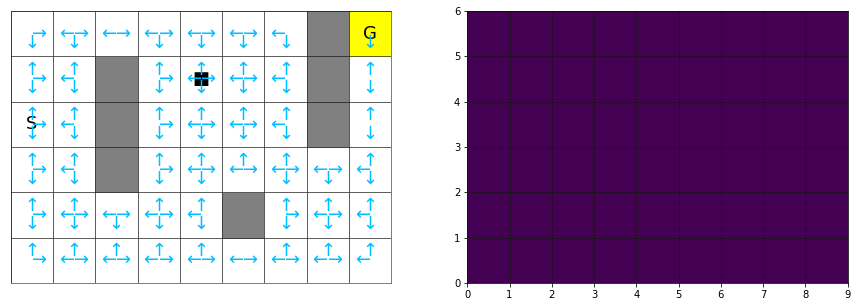

In [335]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


class Maze:
  V_WALL = 3
  V_START = 1
  V_GOAL = 2
  FONTSIZE = 18
  LEFT = '←'
  RIGHT = '→'
  UP = '↑'
  DOWN = '↓'

  def __init__(self, width=9, height=6):
    self.shape = (height, width)
    self.mkMaze()
    self.initSAP()
    self.mkPlt()

  def initSAP(self):
    self.states = list(np.ndindex(self.shape))
    [self.states.remove(wall) for wall in self.wall_indexlist]
    # print(self.states)
    self.actions = [(-1, 0), (1, 0), (0, 1), (0, -1)]
    self.actionSymbols = dict(zip(self.actions, [self.LEFT, self.RIGHT, self.UP, self.DOWN]))
    self.actionSymbolsRev = dict(zip([self.LEFT, self.RIGHT, self.UP, self.DOWN], self.actions))

    self.policy = {}
    self.value = {}

    for s in self.states:
      self.value[s] = 0
    # print(self.wall_indexlist[0] in self.value.keys())
    # print(self.value)
    
    for s in self.states:
      canMoveList = self.supposeMove(s)
      for a in canMoveList:
        self.policy[(s,a)] = 1/len(canMoveList)
    # [print(p) for p in self.policy]

  def supposeMove(self, s):
    canMoveList = []
    for a in self.actions:
      new_s = tuple(np.asarray(s) + np.asarray(a)[::-1])
      # print(np.asarray(a))
      # print(new_s)
      canMove = new_s in self.states
      # print(s, self.actionSymbols[a] + str(a), new_s, canMove)
      if canMove: canMoveList.append(a)

    return canMoveList

  def mkPlt(self):
    # make a color map of fixed colors
    self.cmap = colors.ListedColormap(['white', 'yellow', 'grey'])
    bounds=[0.5, 1.5, 2.5, 9.5]
    self.norm = colors.BoundaryNorm(bounds, self.cmap.N)

    fig, (self.ax, self.ax2) = plt.subplots(1,2, figsize=(15, 5))
    # fig, (self.ax) = plt.subplots()#(2,1) #1, figsize=(9, 6))
  
    self.ax.set_xticks([])
    self.ax.set_yticks([])
    self.ax.axis('on')
    self.ax.spines['left'].set_linewidth(0.5)
    self.ax.spines['right'].set_linewidth(0.5)
    self.ax.spines['top'].set_linewidth(0.5)
    self.ax.spines['bottom'].set_linewidth(0.5)
    self.ax.spines['left'].set_color('k')
    self.ax.spines['right'].set_color('k')
    self.ax.spines['top'].set_color('k')
    self.ax.spines['bottom'].set_color('k')
    # self.ax.spines['left'].set_visible(False)
    # self.ax.spines['right'].set_visible(False)
    # self.ax.spines['top'].set_visible(False)
    # self.ax.spines['bottom'].set_visible(False)

  def mkMaze(self):
    self.maze = np.zeros(self.shape, dtype=int)

    # Mark location
    self.maze[3,0] = self.V_START
    self.maze[5,8] = self.V_GOAL

    # Mark wall for maze
    self.maze[2:5,2] = self.V_WALL
    self.maze[1,5] = self.V_WALL
    self.maze[3:6,7] = self.V_WALL

    self.wall_index = np.where(self.maze == self.V_WALL)
    self.wall_indexlist = list(zip(self.wall_index[0], self.wall_index[1]))
    # print(self.wall_index)

  def isWall(self, state):
    if self.maze[state] == self.V_WALL:
      return True
    else:
      return False

  def isGoal(self, state):
    if self.maze[state] == self.V_GOAL:
      return True
    else:
      return False 

  def setState(self):
    self.ax.pcolor(self.maze,snap='true', edgecolors='k', linewidths=0.5, cmap=self.cmap, norm=self.norm)

    self.ax.text(0.5, 3.5, 'S', fontsize=self.FONTSIZE, ha='center', va='center')
    self.ax.text(8.5, 5.5, 'G', fontsize=self.FONTSIZE, ha='center', va='center')
    self.ax.text(4.5, 4.5, '■', fontsize=self.FONTSIZE, ha='center', va='center')

  def setAction(self):
    argActionLeft = {'fontsize':self.FONTSIZE, 'ha':'right', 'va':'center', 'color' : 'deepskyblue'}
    argActionRight = {'fontsize':self.FONTSIZE, 'ha':'left', 'va':'center', 'color' : 'deepskyblue'}
    argActionUp = {'fontsize':self.FONTSIZE, 'ha':'center', 'va':'bottom', 'color' : 'deepskyblue'}
    argActionDown = {'fontsize':self.FONTSIZE, 'ha':'center', 'va':'top', 'color' : 'deepskyblue'}
    argAction = dict(zip(self.actions, [argActionLeft, argActionRight, argActionUp, argActionDown]))

    for s in self.states:
      if self.isWall(s): continue
      # if self.isGoal(s): continue
      j = s[0] + 0.5
      i = s[1] + 0.5
      for a in self.actions:
        try:
          policy = self.policy[(s, a)]
        except KeyError:
          continue
        if policy <= 0: continue
        actionSymbol = self.actionSymbols[a]
        arg = argAction[a]
        self.ax.text(i, j, actionSymbol, **arg)

  def setValue(self):
    value = np.zeros(self.shape)
    for s in self.value.keys():
      value[s] = self.value[s]
    self.ax2.pcolor(value, snap='true', edgecolors='k', linewidths=0.5)

  def draw(self):
    self.setState()
    self.setAction()
    self.setValue() 
    plt.show()

  def getmaze(self):
    print(self.maze)
    return self.maze

maze = Maze()
maze.draw()